In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os
import math

plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('legend', title_fontsize=10)
plt.rc('figure', titlesize=10)

plt.rc('legend', framealpha=0.0)
plt.rc('lines', linewidth=1.5)

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

matplotlib.rcParams['figure.figsize'] = (textwidth := 6.5, 5)

colormap = plt.cm.plasma
colorize = lambda dim_list : [colormap(i) for i in np.linspace(0.0, 0.92, len(dim_list))]

In [2]:
def get_run(dataset, arch, optim, normalize, width, depth, key, verbose=False):
    logdir = os.path.join("..","logs",dataset,arch,optim,normalize,str(width),str(depth))
    
    if optim == "adam" and normalize != "normalize":
        lr_list = [0.00012207031, 0.00024414062, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125]
    else:
        lr_list = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
    
    returned_result_list = []
    returned_lr_list = []
    
    for lr in lr_list:
        try:
            with open(os.path.join(logdir, str(lr), 'results.pickle'), "rb") as file:
                results = pickle.load(file)[key]
            average_result = np.mean(results[-1000:])
            returned_result_list.append(average_result)
            returned_lr_list.append(lr)
        except:
            if verbose:
                print(f"warning: missing {optim} {normalize} width={width} depth={depth} lr={lr}")
    
    return returned_lr_list, returned_result_list

# ResMLP width sweeps

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


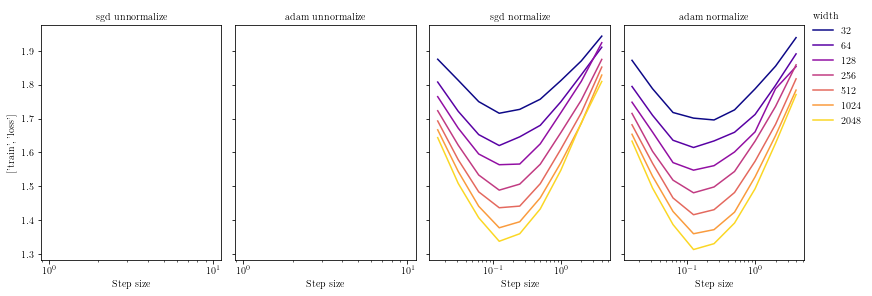

In [3]:
width_list = [32, 64, 128, 256, 512, 1024, 2048]; legend_title = "width"
depth = 3
dataset = "cifar10"
arch = "resmlp"
key = "train_loss"

fig, axes = plt.subplots(1, 4, sharey=True, constrained_layout=True)

axis = 0
for normalize in "unnormalize", "normalize":
    for optim in "sgd", "adam":
        for width, color in zip(width_list, colorize(width_list)):
            lr_list, result_list = get_run(dataset, arch, optim, normalize, width, depth, key)
            axes[axis].plot(lr_list, result_list, color=color, label=width)
            axes[axis].set_xscale("log")
            axes[axis].set_title(optim + " " + normalize)
            axes[axis].set_xlabel("Step size")
        axis += 1
axes[0].set_ylabel(key.split("_"))

fig.set_size_inches(12, 4)
plt.legend(title=legend_title, bbox_to_anchor=(1.0, 1.1))._legend_box.align = "left"
plt.show()

# ResMLP depth sweeps

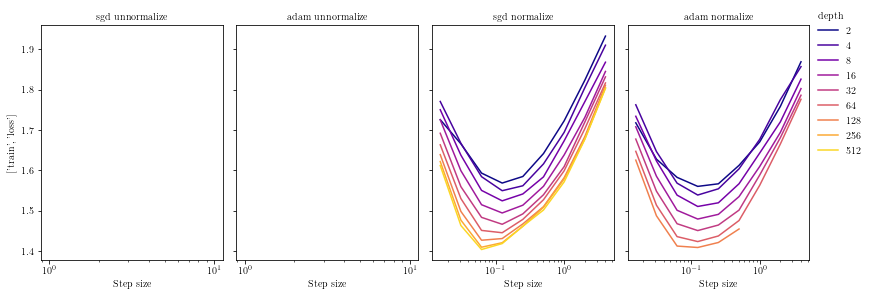

In [4]:
depth_list = [2, 4, 8, 16, 32, 64, 128, 256, 512]; legend_title = "depth"
width = 128
dataset = "cifar10"
arch = "resmlp"
key = "train_loss"

verbose = False

fig, axes = plt.subplots(1, 4, sharey=True, constrained_layout=True)

axis = 0
for normalize in "unnormalize", "normalize":
    for optim in "sgd", "adam":
        for depth, color in zip(depth_list, colorize(depth_list)):
            lr_list, result_list = get_run(dataset, arch, optim, normalize, width, depth, key, verbose)
            axes[axis].plot(lr_list, result_list, color=color, label=depth)
            axes[axis].set_xscale("log")
            axes[axis].set_title(optim + " " + normalize)
            axes[axis].set_xlabel("Step size")
        axis += 1
axes[0].set_ylabel(key.split("_"))

fig.set_size_inches(12, 4)
plt.legend(title=legend_title, bbox_to_anchor=(1.0, 1.1))._legend_box.align = "left"
plt.show()